# Digits
This will demonstrate using an AI classifier trained on a data set. This example will use the Support Vector Classification model. This model is good for classification, but not good for continous results.

The data will be a set of handwritten digits originally created by NIST for handwriting recognition algorithm development for zip codes used by the post office. The package sklearn has a set of datasets that can be used to play with neural networks. We will be using the digits data from the dataset.

The images were originally in 64x64 size, and have been reduced to 8x8 graphic images. They look quite blurry at this resolution, but you may be suprised by the result.

As always, start by importing a bunch of things. New for this discussion is the sklearn module. you may need to install sklearn in anaconda, or on your system with pip.

In [2]:
import sklearn.datasets as datasets
import sklearn
import sklearn.svm as svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math as m
import random

Get the digits data set. Put it in a variable named digits. 

In [3]:
digits = datasets.load_digits()

Take a look at what is there. It has several members. The first is called data, and is the input data. It consists of a 64 value list representing the image intensity. It is a list of lists.  

Print them out. ipython will put in ... when trying to print too much.

In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


The second member we care about is target. This is the digit represented by the picture.  target[5] goes with data[5].

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Take a look at just the data for the first picture. It is 64 numbers. they seem to range from 0 to 16.

In [6]:
print(digits.data[0])
max([max(digits.data[q]) for q in range(len(digits.data))])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


16.0

check and make sure there are 64 data items in the picture data.

In [7]:
print(len(digits.data[0]))

64


Yes, there are 64 numbers in the data.

Create a function to plot the pictures. It takes the digit data, and which one to plot.  r and c are the number of rows and columns. Array_like will have the array like result to be plotted. An ellaboration is used to copy the data. This prevents it from being changed in the original 'digits' variable. imshow shows an image. cmap='Greys' indicates to use the numbers as a grey scale image (B&W)


In [8]:
def pltdigit(dt,n):
    dlen=len(dt.data[n])
    r=int(m.sqrt(dlen))
    c=r
    array_like=[]
    cnt=0
    for rx in range(r):
        array_like.append([dt.data[n][cnt+cx] for cx in range(c)])
        cnt += r
    print("The digit {}".format(dt.target[n]))
    im=np.array(array_like)
    fig,ax = plt.subplots(1)
    ax.imshow(im,cmap='Greys')
    plt.show()


The digit 0


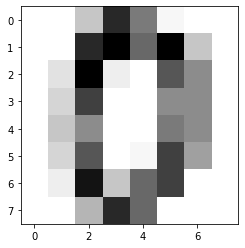

In [9]:
pltdigit(digits,0)

The digit 1


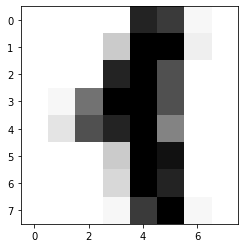

In [10]:
pltdigit(digits,11)

The digit 2


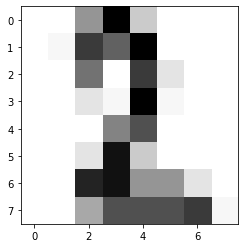

In [11]:
pltdigit(digits,22)

Now we know what the data looks like, it is time to get ready for the ai function. First, split the data into a training set, and a testing set. The ai algorithm will work on the the training data, and build a set of internal values that will be used to analyze unknown data and predict which data is there.

random.seed() is used to get the same results each time.  random.shuffle will take the set of indexes, and scramble them randomly. 95% of the data will be used for training, and 5% for testing. 

In [12]:
rawX = [x for x in range(len(digits.data))] # data indexes
random.seed(4321)
random.shuffle(rawX) # scramble them up a lot
ntrain=int(0.95*len(digits.data)) # How many to use for training
trainX = rawX[0:ntrain]
print(trainX[:10])
td=[digits.data[x] for x in trainX]
rd=[digits.target[x] for x in trainX]
testd=[digits.data[x] for x in rawX[ntrain:]]
testr=[digits.target[x] for x in rawX[ntrain:]]

[1211, 360, 1558, 1192, 1750, 329, 508, 1570, 962, 320]


Below, we print out all test data

In [18]:
print(td)

[array([ 0.,  4., 15., 16., 13.,  1.,  0.,  0.,  0.,  9., 14., 10., 16.,
        6.,  0.,  0.,  0.,  1.,  1.,  6., 16.,  2.,  0.,  0.,  0.,  0.,
        0.,  8., 14.,  1.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  0.,  0.,
        0.,  0.,  0., 13., 14.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  9.,
        8.,  8., 10.,  0.,  0.,  4., 15., 16., 16., 16.,  9.,  0.]), array([ 0.,  0.,  1., 13.,  7.,  0.,  0.,  0.,  0.,  0.,  7., 14.,  2.,
        0.,  0.,  0.,  0.,  0., 13.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
       16.,  3.,  0.,  0.,  0.,  0.,  0.,  3., 16., 10., 12., 12.,  3.,
        0.,  0.,  3., 16., 11.,  5.,  9., 12.,  0.,  0.,  1., 13., 11.,
        4., 13., 11.,  0.,  0.,  0.,  1., 12., 16., 11.,  2.,  0.]), array([ 0.,  0.,  3., 11., 13., 15.,  3.,  0.,  0.,  4., 16., 14., 11.,
       16.,  8.,  0.,  0.,  2.,  5.,  0., 14., 15.,  1.,  0.,  0.,  0.,
        0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  0., 11., 10.,  0.,
        0.,  0.,  0.,  0.,  0.,  8., 12.,  0.,  0.,  0.,  0.,  8., 11

Below, we print out all recognized data. Firt digit was recognized as number 2.
Second digit was recognized as number 6, etc.

In [14]:
print(rd)

[2, 6, 3, 5, 3, 9, 8, 7, 3, 4, 3, 8, 4, 1, 5, 0, 8, 9, 8, 8, 1, 8, 2, 7, 4, 6, 4, 8, 9, 0, 5, 6, 0, 6, 6, 3, 9, 1, 4, 9, 4, 7, 8, 8, 1, 2, 2, 5, 3, 5, 6, 0, 0, 8, 9, 5, 1, 1, 7, 5, 6, 2, 7, 7, 8, 2, 8, 9, 4, 1, 7, 6, 2, 2, 1, 2, 3, 4, 1, 1, 4, 0, 9, 1, 6, 3, 3, 4, 9, 0, 8, 7, 1, 5, 1, 5, 8, 2, 0, 8, 5, 0, 0, 3, 4, 1, 7, 4, 3, 9, 7, 4, 1, 2, 1, 0, 9, 9, 7, 4, 5, 6, 3, 7, 5, 8, 3, 9, 7, 4, 9, 4, 7, 5, 2, 5, 0, 9, 9, 6, 0, 4, 5, 1, 4, 7, 9, 8, 5, 6, 8, 1, 1, 2, 6, 3, 9, 5, 3, 9, 6, 9, 8, 3, 3, 8, 1, 1, 6, 1, 8, 5, 4, 4, 8, 2, 0, 3, 1, 6, 4, 3, 3, 3, 4, 8, 5, 3, 3, 5, 2, 5, 2, 6, 6, 4, 1, 1, 5, 3, 9, 4, 9, 8, 4, 2, 6, 4, 4, 9, 5, 7, 3, 5, 2, 0, 5, 8, 6, 9, 2, 7, 6, 1, 2, 8, 5, 9, 3, 6, 7, 0, 3, 8, 3, 7, 0, 9, 7, 1, 6, 2, 0, 0, 8, 0, 6, 7, 9, 0, 3, 9, 6, 4, 7, 2, 0, 5, 3, 1, 5, 1, 8, 3, 9, 4, 1, 7, 4, 1, 8, 0, 2, 3, 0, 8, 6, 2, 0, 4, 9, 6, 8, 7, 9, 6, 6, 6, 8, 6, 0, 3, 7, 1, 4, 6, 3, 5, 7, 6, 2, 7, 9, 1, 2, 8, 1, 5, 7, 9, 8, 4, 4, 1, 3, 7, 9, 7, 3, 2, 8, 8, 4, 3, 9, 3, 5, 9, 0, 1, 0, 1, 0, 

Let's modify the pltdigit function to plot out our test data to 
see if it is the same as recognized data

In [19]:
def plttd(td):
    dlen=len(td)
    r=int(m.sqrt(dlen))
    c=r
    array_like=[]
    cnt=0
    for rx in range(r):
        array_like.append([td[cnt+cx] for cx in range(c)])
        cnt += r
    print("The digit {}".format(td))
    im=np.array(array_like)
    fig,ax = plt.subplots(1)
    ax.imshow(im,cmap='Greys')
    plt.show()


Note that each value below represents how dark the pixel is. 0 = all white. 16 = all black.

The digit [ 0.  4. 15. 16. 13.  1.  0.  0.  0.  9. 14. 10. 16.  6.  0.  0.  0.  1.
  1.  6. 16.  2.  0.  0.  0.  0.  0.  8. 14.  1.  0.  0.  0.  0.  5. 16.
  5.  0.  0.  0.  0.  0. 13. 14.  0.  0.  0.  0.  0.  5. 16.  9.  8.  8.
 10.  0.  0.  4. 15. 16. 16. 16.  9.  0.]


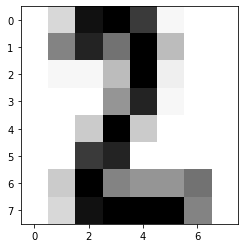

In [20]:
plttd(td[0])

The digit [ 0.  0.  1. 13.  7.  0.  0.  0.  0.  0.  7. 14.  2.  0.  0.  0.  0.  0.
 13.  5.  0.  0.  0.  0.  0.  0. 16.  3.  0.  0.  0.  0.  0.  3. 16. 10.
 12. 12.  3.  0.  0.  3. 16. 11.  5.  9. 12.  0.  0.  1. 13. 11.  4. 13.
 11.  0.  0.  0.  1. 12. 16. 11.  2.  0.]


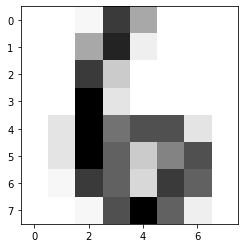

In [21]:
plttd(td[1])

Create the classifier. (it makes a class with good stuff in it). gamma and C are parameters to get a good result. It's a black box for now.

In [22]:
clf=svm.SVC(gamma=0.001, C=100.,degree=5)

fit the data, and create the model (it will be left inside the clf class object)

In [23]:
clf.fit(td,rd)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The predict function of SVC (in clf) will take the test data provided, and classify it into an output list.  Then compare that to the expected, and create a set of true/false results for the test set data.

In [24]:
predr=clf.predict(testd)
okish=[predr[x]==testr[x] for x in range(len(predr))]

Use a for loop to print out the ones that didn't get classified correctly.

In [25]:
for ix in range(len(okish)):
    if not okish[ix]:
        print("got {0} hoped for {1}".format(predr[ix],testr[ix]))

Oops, they all worked. The SVC model has a function called score that takes the test input, and the test expected results. It then performs a predict and compares to the expected result. The returned value is the fraction correct. (1.0 is all of them)

In [26]:
clf.score(testd,testr)

1.0

They were all classified correctly.

Try the training data. (Sometimes, it doesn't get all that right)

In [27]:
clf.score(td,rd)

1.0

It worked :-)

The SCV model knows how to recognize handwritten digits if they are fit into an 8x8 box and coded 0 to 16.

Just for enlightenment, ask what is in clf. This is done using __dict__ (a dictionary of variable names to the actual objects). The keys are the names.

Some interesting stuff. Need to read the source code to find more.

In [28]:
print(clf.__dict__.keys())

dict_keys(['decision_function_shape', 'break_ties', 'kernel', 'degree', 'gamma', 'coef0', 'tol', 'C', 'nu', 'epsilon', 'shrinking', 'probability', 'cache_size', 'class_weight', 'verbose', 'max_iter', 'random_state', '_sparse', 'class_weight_', 'classes_', '_gamma', 'support_', 'support_vectors_', '_n_support', 'dual_coef_', 'intercept_', 'probA_', 'probB_', 'fit_status_', 'shape_fit_', '_intercept_', '_dual_coef_'])


In [29]:
clf.support_vectors_

array([[ 0.,  0.,  2., ...,  1.,  0.,  0.],
       [ 0.,  0.,  7., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  8., ..., 16., 11.,  1.],
       [ 0.,  0.,  1., ..., 11.,  1.,  0.],
       [ 0.,  0.,  7., ..., 13.,  2.,  0.]])